# Final Project

**Due date: Saturday, December 9th**

For your final project you will develop a data narrative with a dataset of your choosing. Your data can come from any source. You do not have to comprehensively explore your data. Pick an interesting aspect or two from which to build your narrative.

## Requirements

- At least **three** visualizations. Visualizations can be simple bar charts that total data categories or rich exploratory figures. (*Tables also count as visualizations but you must have at least two charts.*) 
- All of the code should be recorded in your narrative. That is, I should be able to run your notebook code start to finish re-producing each of your outputs without error.
- At least **two** but no more than **three** paragraphs walking the reader through your analysis.
- Charts should exhibit your command of `ggplot2/dplyr/forcats/tidyr` with: 
  - sensibly sorted categories, 
  - interpretable labels/axis titles, 
  - useful annotations (when applicable), 
  - adjustments to default chart aesthetics, 
  - appropriate markings (e.g. `geoms`) and encodings.

## Notes

*This project should not take you longer than the time to complete two of our assignments. It is meant to demonstrate that you can build an analysis using `R` and the `Tidyverse` from scratch. Focus your analysis on a small number of data features that you find interesting.*

*Remember all the ways of visualizing distributions (ECDFs, histograms, jitter-ed scatter plots, etc.). These will come in very handy!* 

### Narative: The Diwali Sales Data from Tidy Tuesday will be used for analysis. 

In [1]:
# Load Diwali Sales data from TidyTuesday
library ('tidyverse')
library(dplyr)
diwali = read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-11-14/diwali_sales_data.csv')
diwali |> head()

Warning message:
“Failed to locate timezone database”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 11251 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (8): Cust_name, Product_ID, Gender, Age Group, State, Zone, Occupation, ...
dbl (5): User_ID, Age, Marital_Status, Orders, Amount

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877


# Visualization 1

### Narrative: The first visualization will show the total sales for each state in India. The data is grouped by state. The amount is then summed for each state. For the table, only the state and total amount information are shown. Utter Pradesh had the highest in sales. Telangana had the lowest. 

In [2]:
#Total amount of sales from customers by state (analysis)
sales_by_state = diwali |>
  group_by(State) |>
  summarize(Total_Amount = sum(Amount, na.rm = TRUE)) |>
  select(State, Total_Amount)
sales_by_state 

State,Total_Amount
<chr>,<dbl>
Andhra Pradesh,8037147
Bihar,4022757
Delhi,11603819
Gujarat,3946082
Haryana,4220175
Himachal Pradesh,4963368
Jharkhand,3026456
Karnataka,13523540
Kerala,3894492


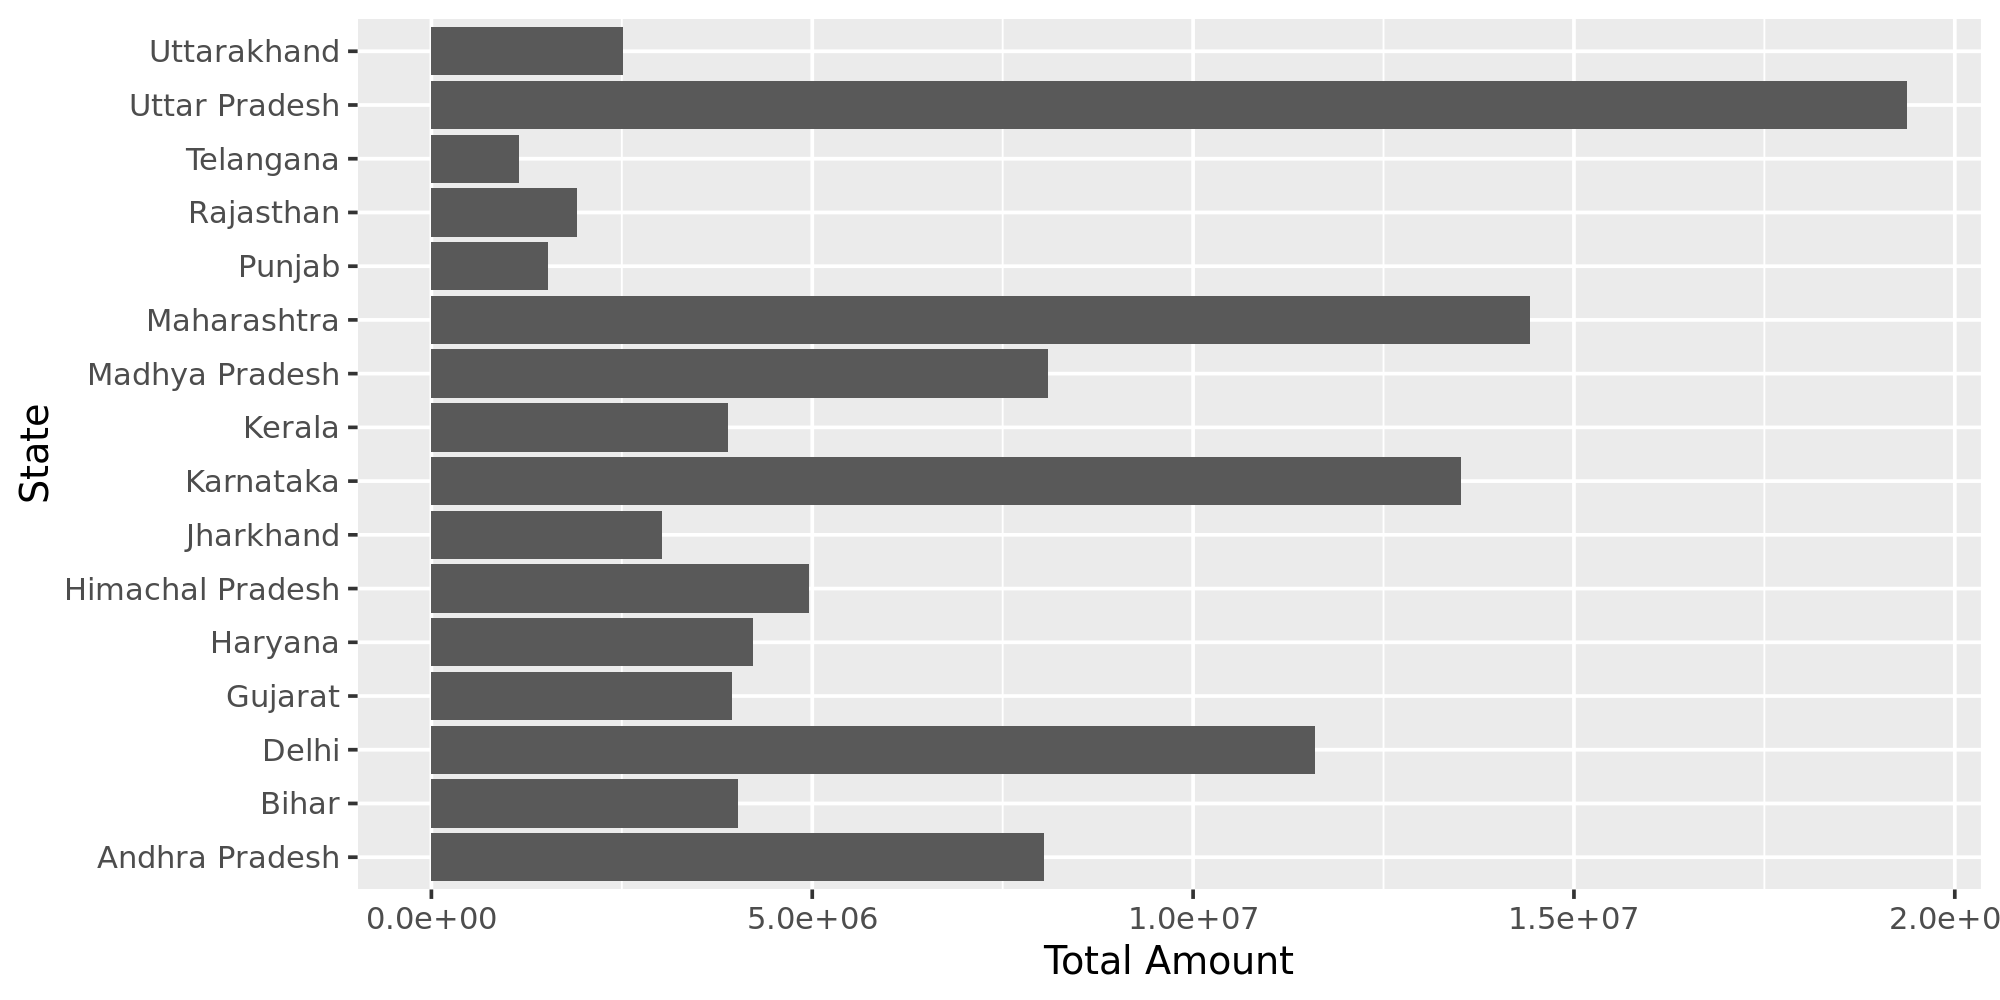

In [3]:
#Bar Chart
# state=identity is plotting the actual values stored in the 'Total_Amount' variable
options(repr.plot.res = 250, repr.plot.height = 4, repr.plot.width = 8)
ggplot(sales_by_state, aes(x = Total_Amount, y = State)) +
  geom_bar(stat = "identity") +
  labs(
    x = "Total Amount",
    y = "State"
  )


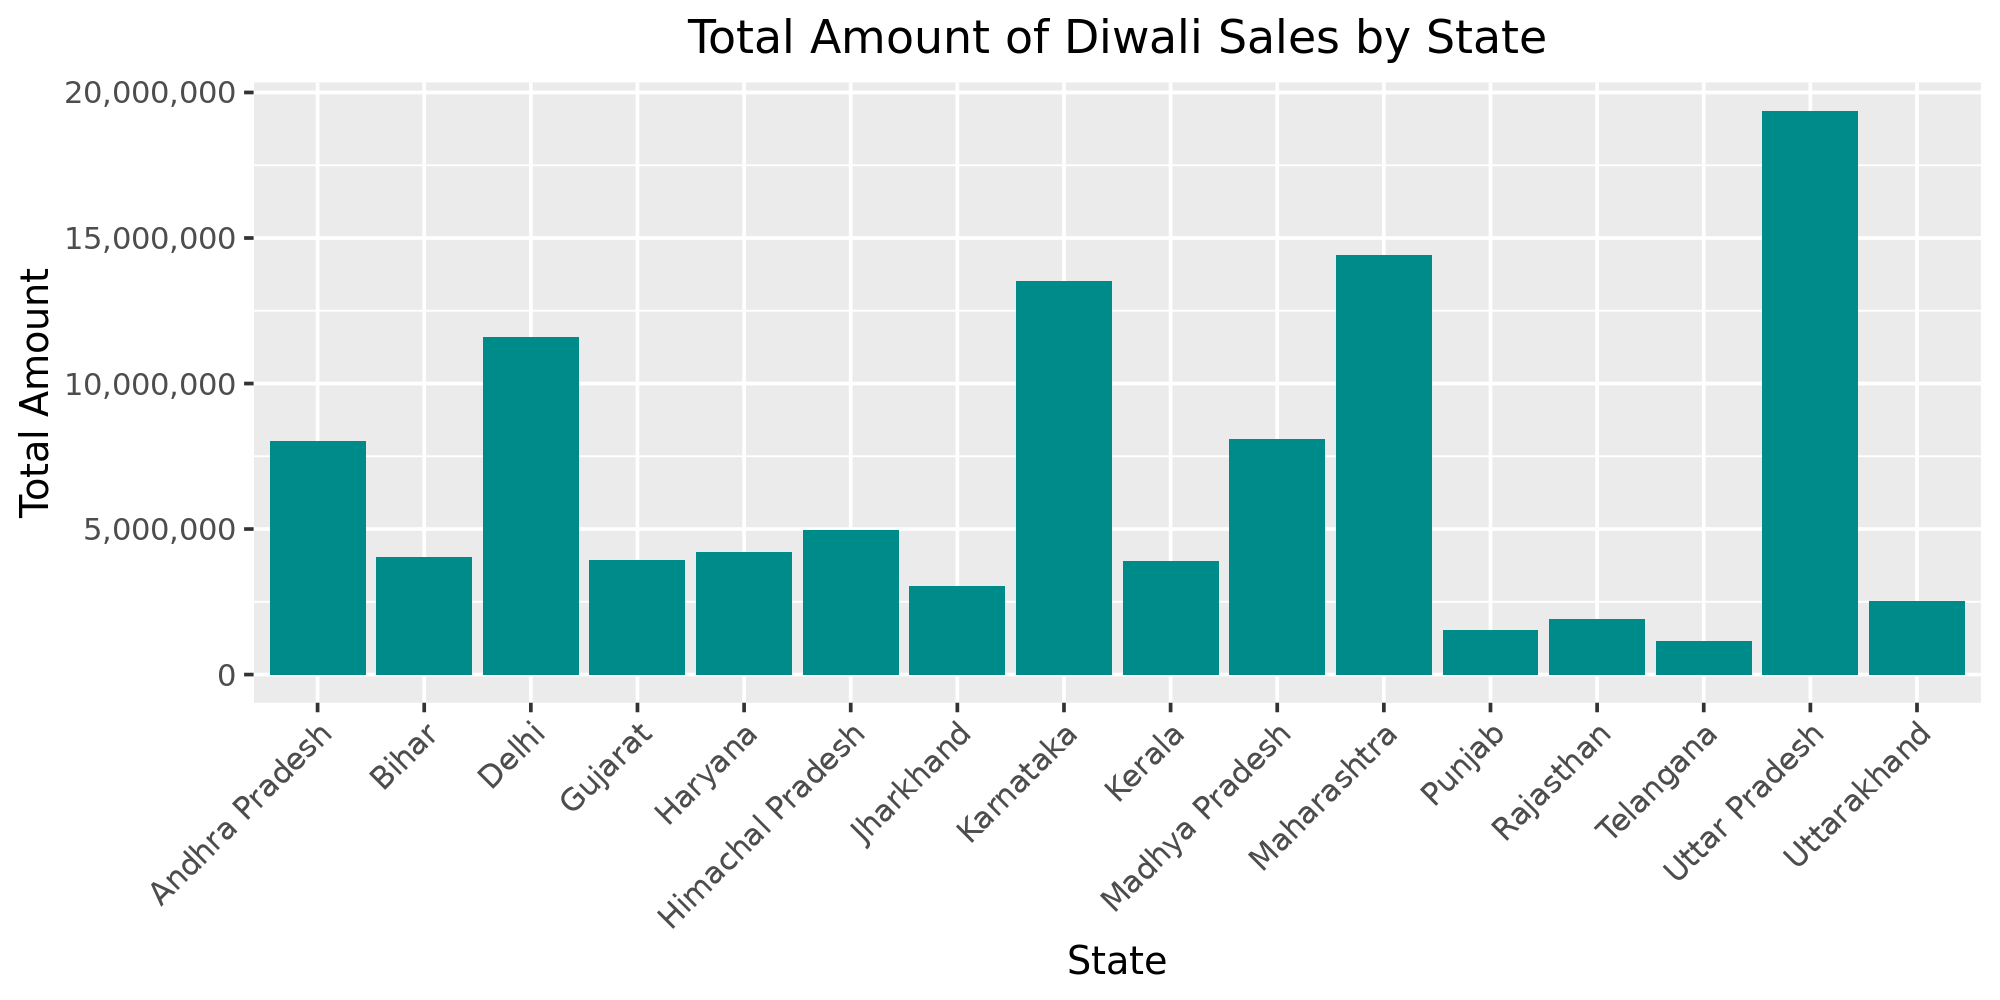

In [4]:
#Adjustments
ggplot(sales_by_state, aes(x = State, y = Total_Amount)) +
  geom_bar(stat = "identity", fill = "darkcyan") +
  labs(
    x = "State",
    y = "Total Amount"
  ) +
  scale_y_continuous(labels = scales::comma) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        plot.title = element_text(hjust = 0.5) ) +
  ggtitle("Total Amount of Diwali Sales by State")

# Visulization 2

### The second visualization shows the total sales for each age group. The data was grouped by age brackets. The total amount was then calculated for each age group. The table shows the age and sales information. There was an increase in sales as the age increased. The sales peaked for customers aged 26-35. Then it decreased continuously as the age increased. 

In [5]:
colnames(diwali)[colnames(diwali) == "Age Group"] = "Age_Group"
print(colnames(diwali))

 [1] "User_ID"          "Cust_name"        "Product_ID"       "Gender"          
 [5] "Age_Group"        "Age"              "Marital_Status"   "State"           
 [9] "Zone"             "Occupation"       "Product_Category" "Orders"          
[13] "Amount"          


In [6]:
#Sales by age group
colnames(diwali)["Age Group"] <- "Age_Group"
sales_by_age_group = diwali |>
  group_by(Age_Group) |>
  summarize(Total_Amount = sum(Amount, na.rm = TRUE)) |>
  select(Age_Group, Total_Amount)
sales_by_age_group

Age_Group,Total_Amount
<chr>,<dbl>
0-17,2699653
18-25,17240732
26-35,42613444
36-45,22144995
46-50,9207844
51-55,8261477
55+,4080987


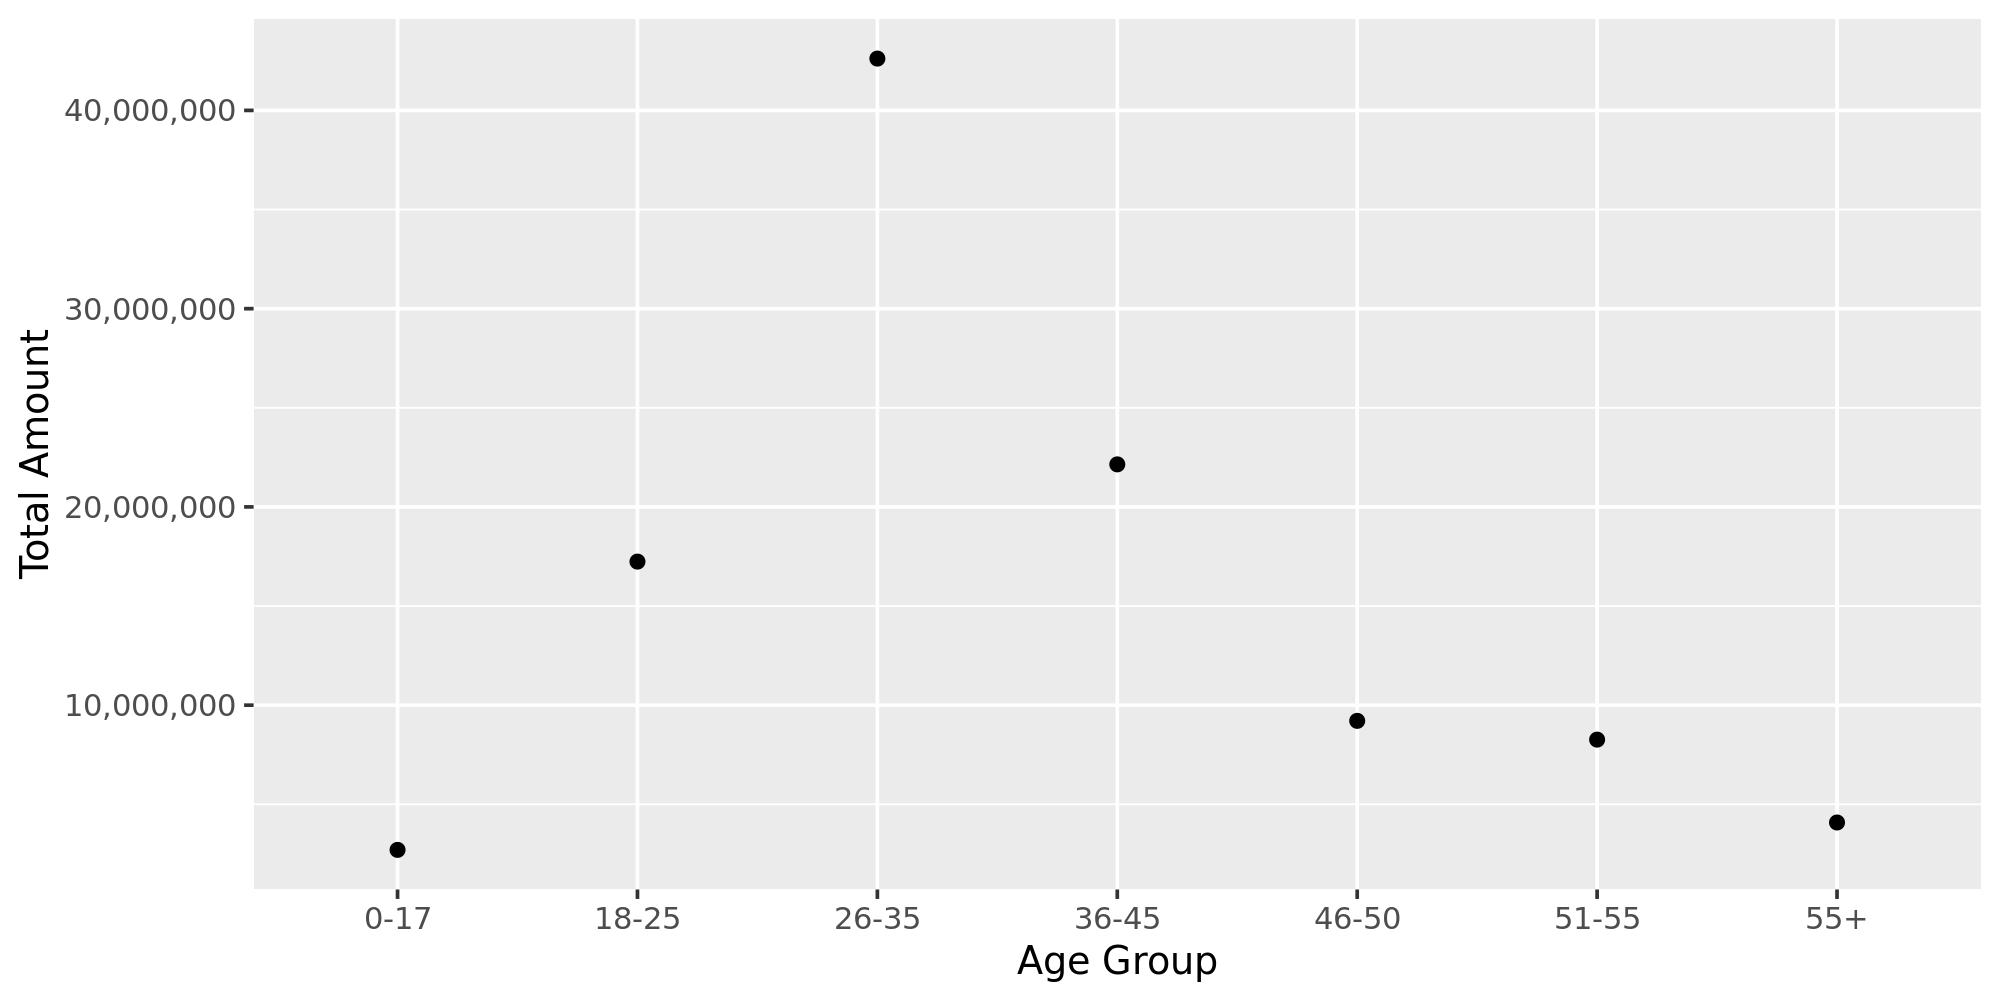

In [7]:
options(repr.plot.res = 250, repr.plot.height = 4, repr.plot.width = 8)
ggplot(sales_by_age_group, aes(x = Age_Group, y = Total_Amount)) +
  geom_point() +
  labs(
    x = "Age Group",
    y = "Total Amount"
  ) +
  scale_y_continuous(labels = scales::comma)

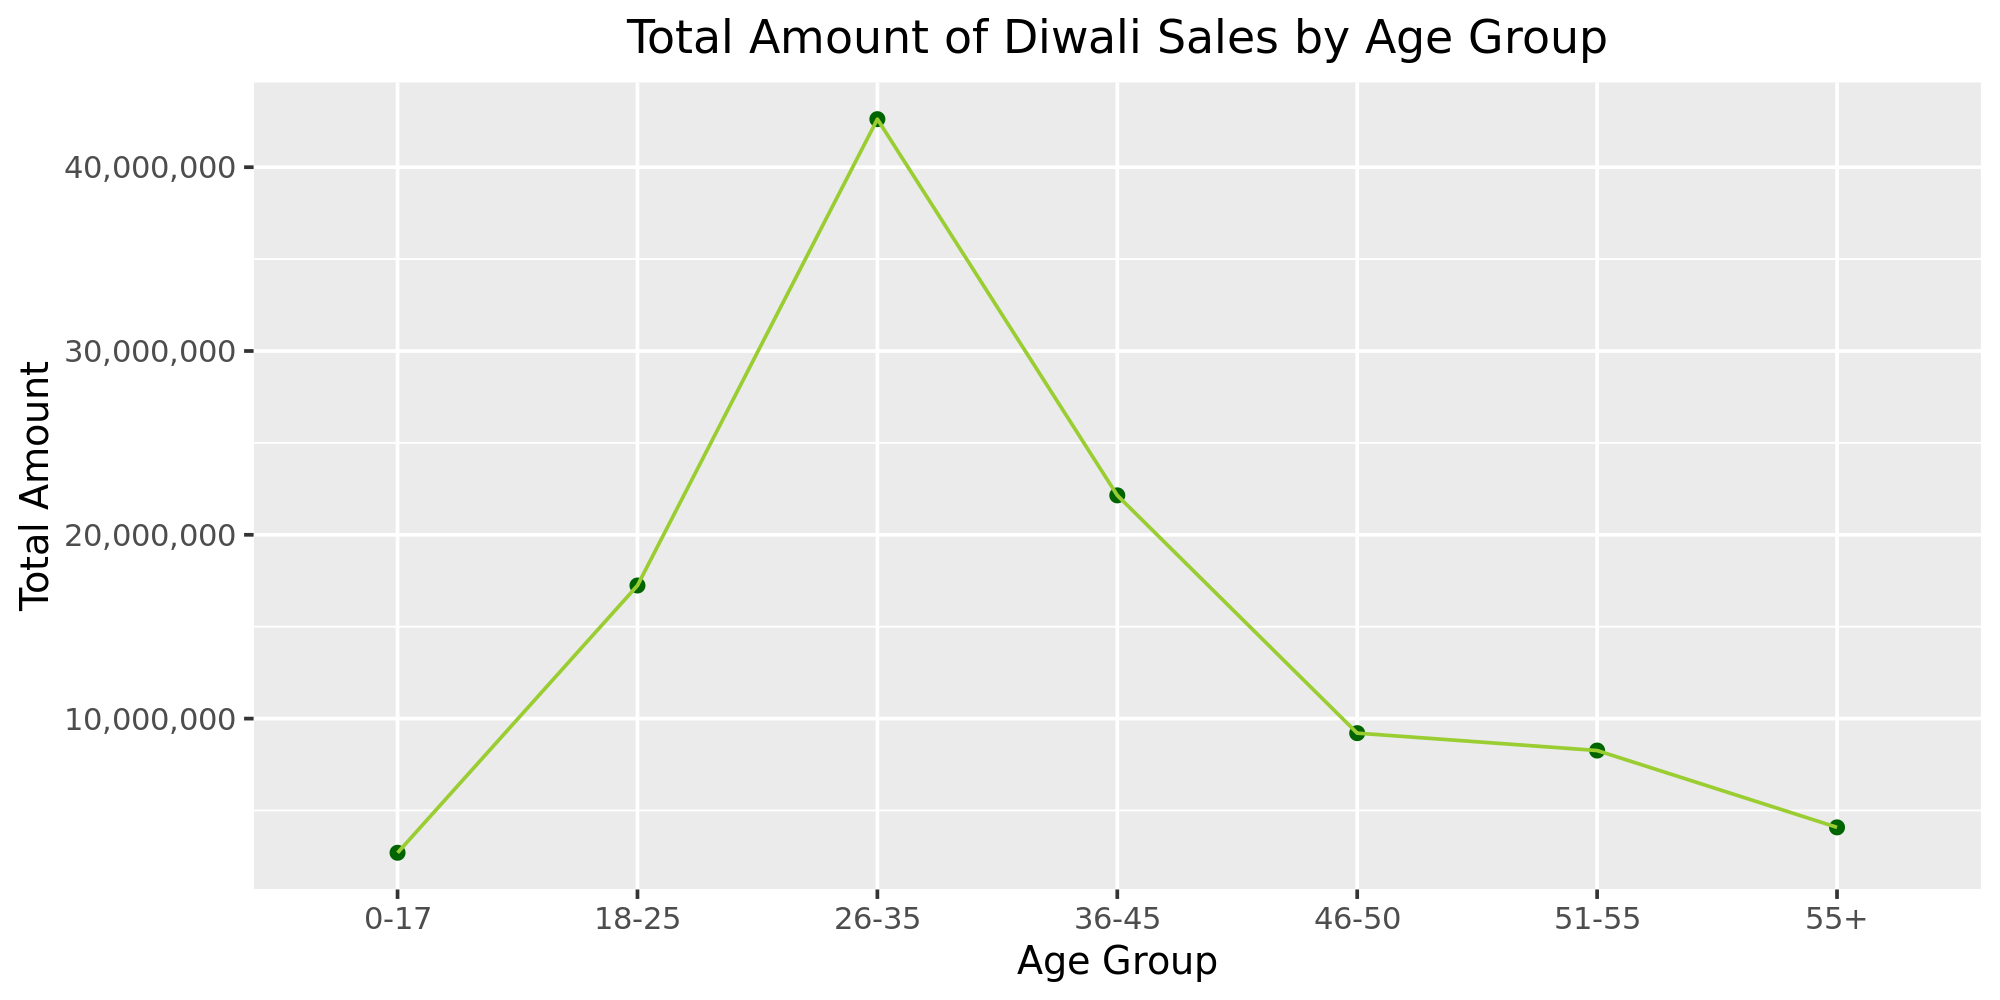

In [8]:
#Adjustments
ggplot(sales_by_age_group, aes(x = Age_Group, y = Total_Amount)) +
  geom_point(color='darkgreen') +
  geom_line(aes(group = 1), color = "yellowgreen") + 
  labs(
    x = "Age Group",
    y = "Total Amount"
  ) +
  scale_y_continuous(labels = scales::comma) + 
  theme(plot.title = element_text(hjust = 0.5)) +  
  ggtitle("Total Amount of Diwali Sales by Age Group")

# Visualization 3

### The third visualization shows the total sales for each age group for each product category. The data was grouped by age brackets and product category. The total amount was then calculated for each age group. The table shows the age, product category, and sales information. Electronics and gadgets had the highest sales for all age groups. 

In [9]:
colnames(diwali)["Age Group"] <- "Age_Group"
sales_by_age_group_Cat = diwali |>
  group_by(Age_Group, Product_Category) |>
  summarize(Total_Amount = sum(Amount, na.rm = TRUE), .groups = 'drop') |>
  select(Age_Group, Product_Category, Total_Amount)
sales_by_age_group_Cat

Age_Group,Product_Category,Total_Amount
<chr>,<chr>,<dbl>
0-17,Auto,56883
0-17,Beauty,41129
0-17,Books,10249
0-17,Clothing & Apparel,437011
0-17,Decor,7956
0-17,Electronics & Gadgets,456666
0-17,Food,1079989
0-17,Footwear & Shoes,78907
0-17,Furniture,195373


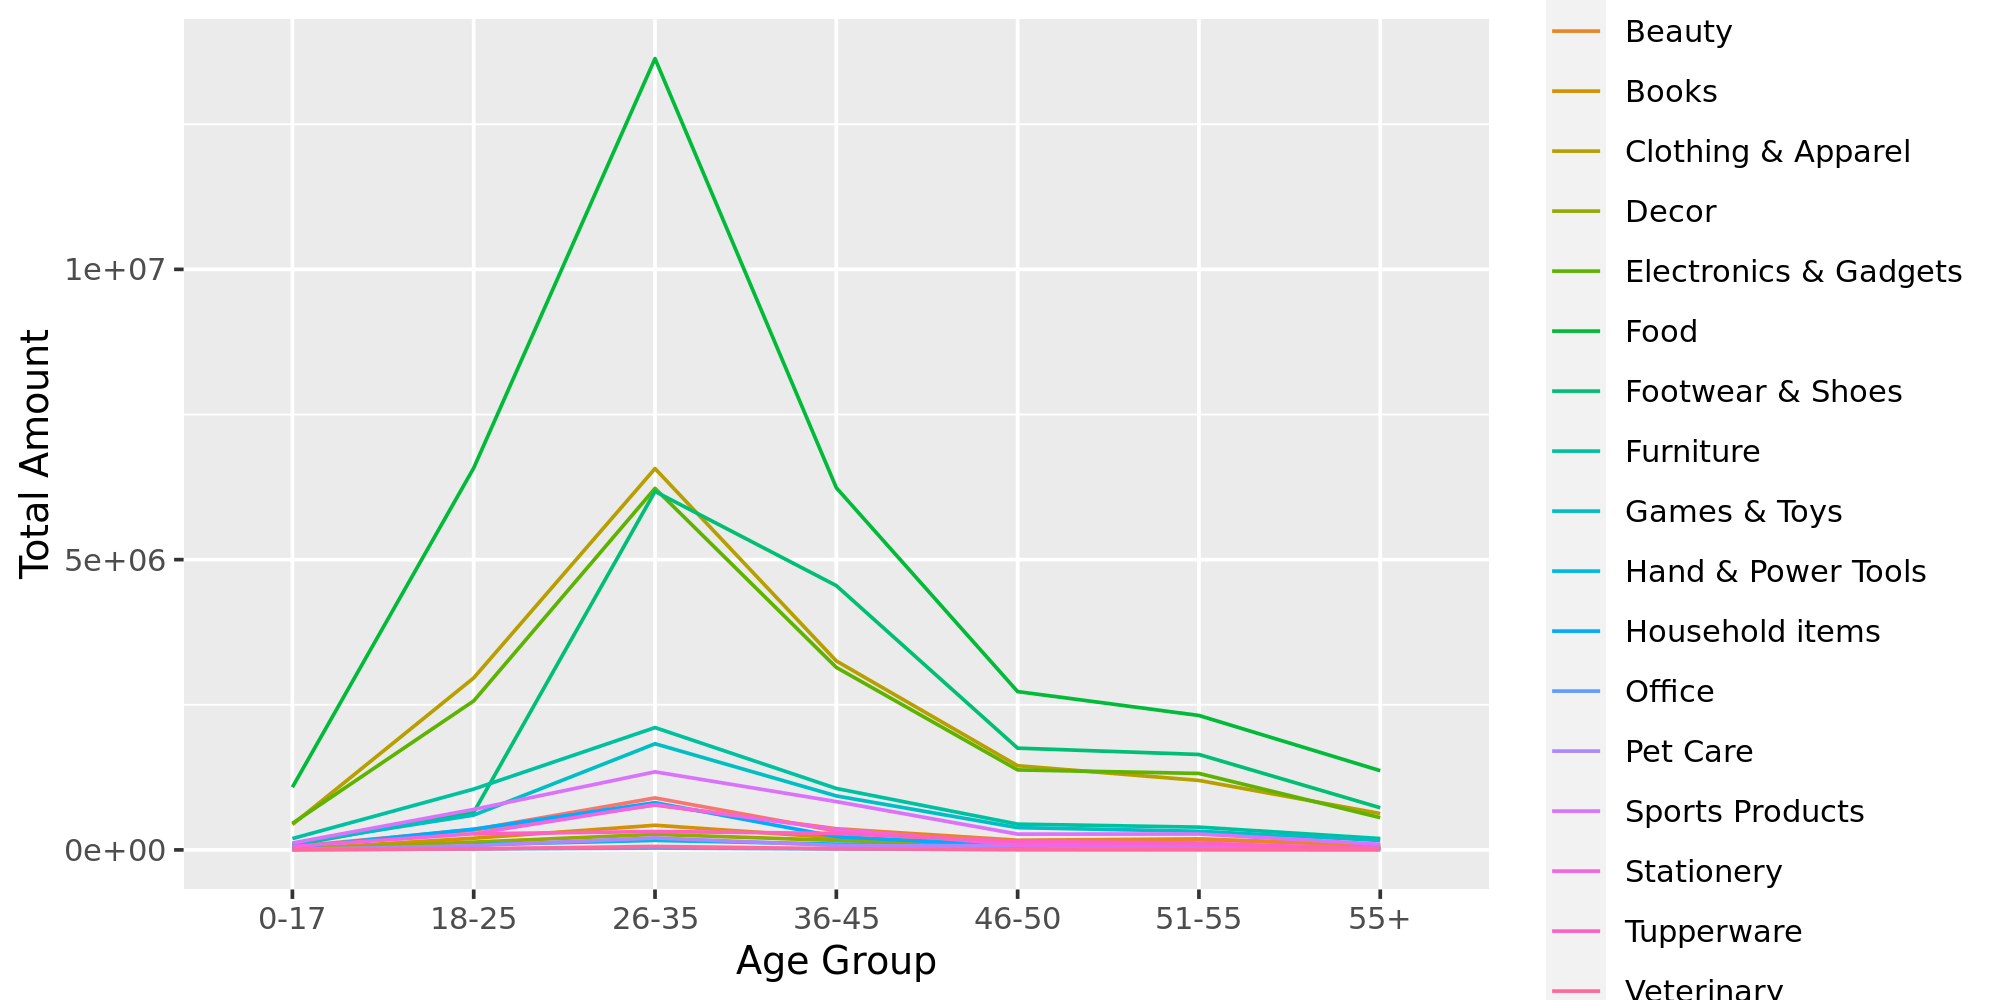

In [10]:
ggplot(sales_by_age_group_Cat, aes(x = Age_Group, y = Total_Amount, color = Product_Category)) +
  geom_line(aes(group = Product_Category)) +
  labs(
    x = "Age Group",
    y = "Total Amount"
  ) 

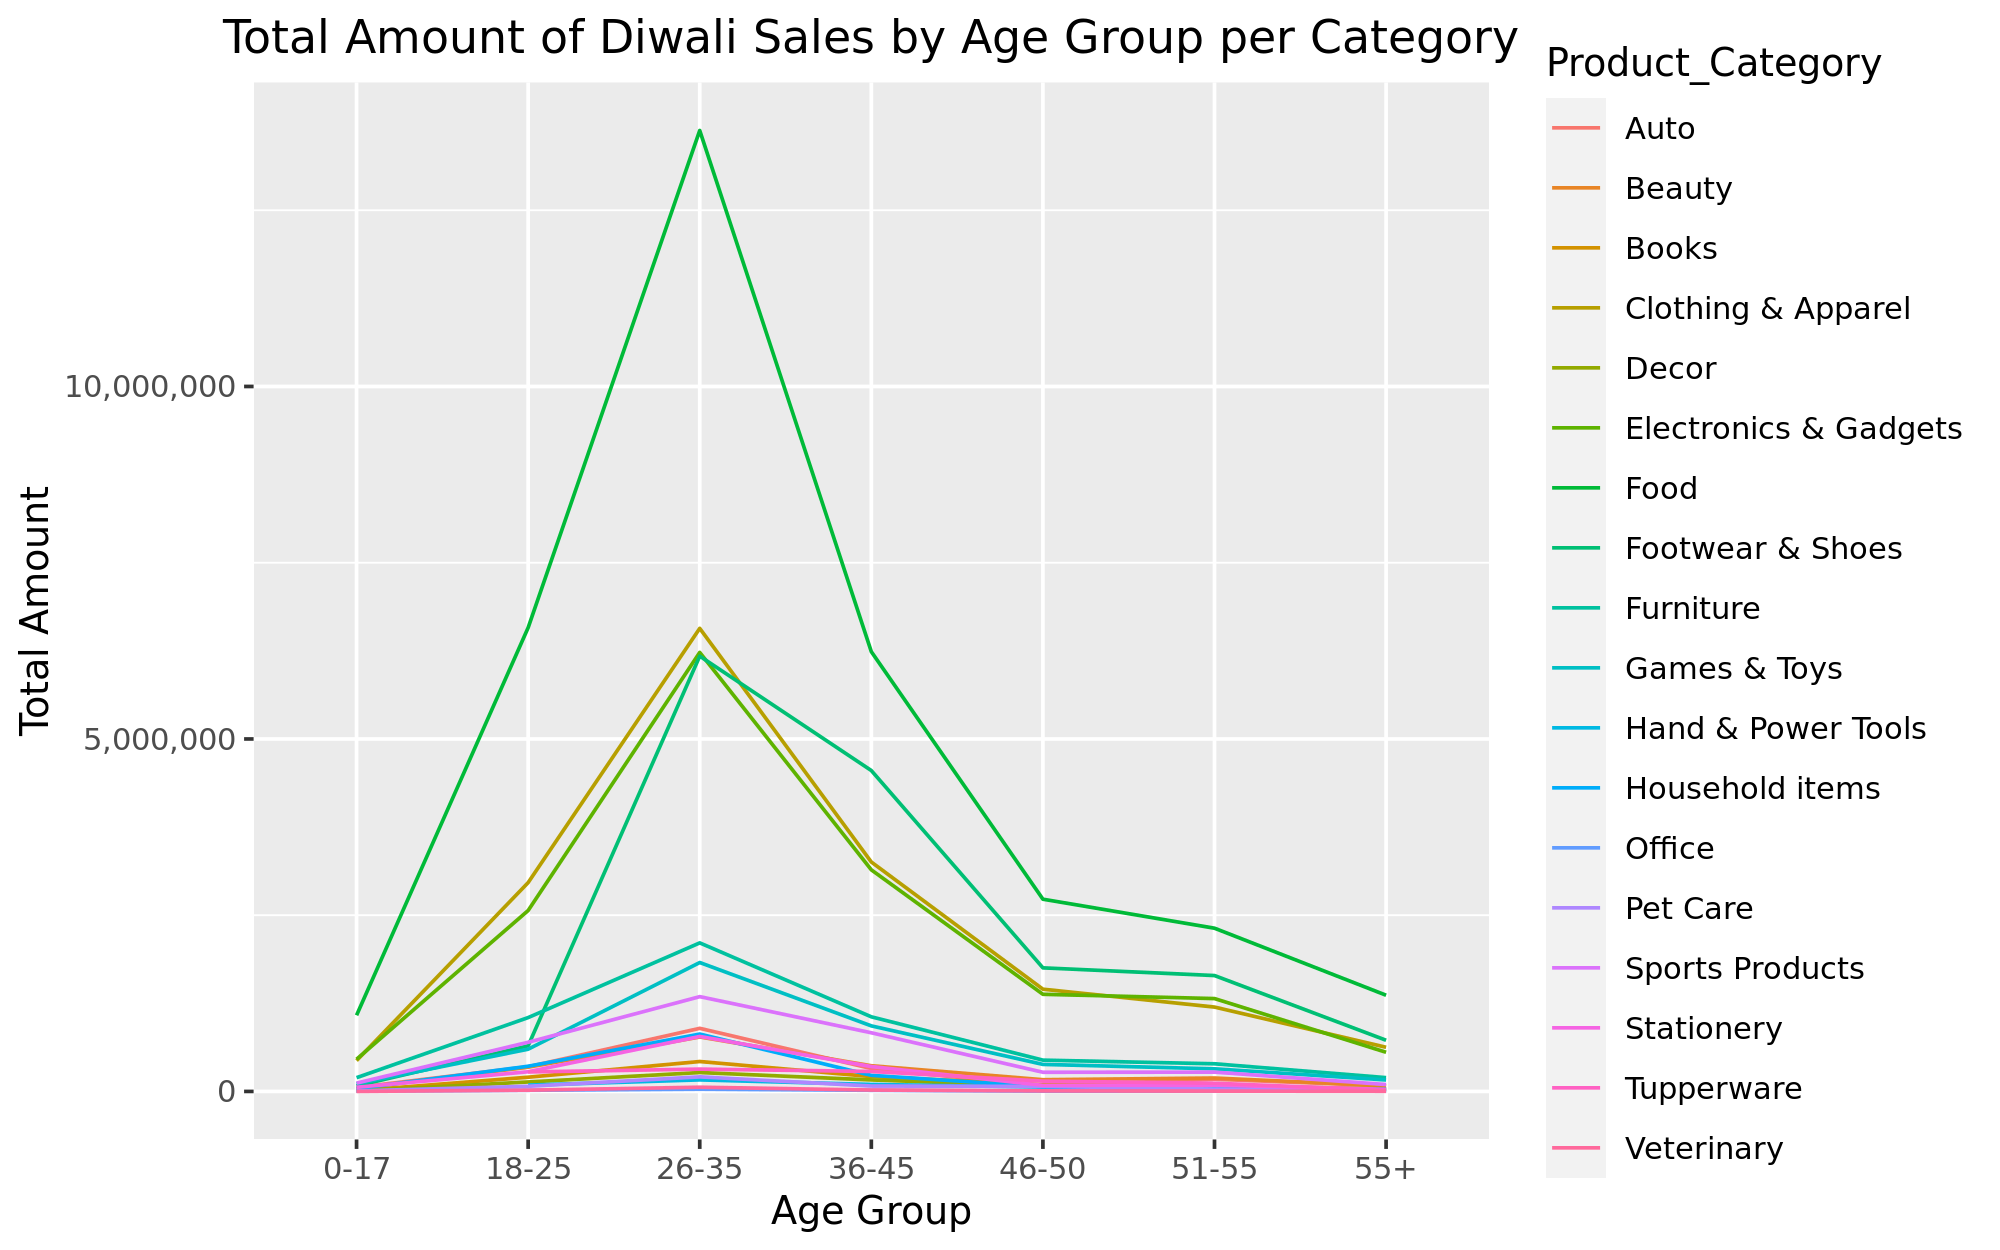

In [11]:
#Adjustments
options(repr.plot.res = 250, repr.plot.height = 5, repr.plot.width = 8)
ggplot(sales_by_age_group_Cat, aes(x = Age_Group, y = Total_Amount, color = Product_Category)) +
  geom_line(aes(group = Product_Category)) +
  labs(
    x = "Age Group",
    y = "Total Amount"
  ) + 
  scale_y_continuous(labels = scales::comma) + 
  theme(plot.title = element_text(hjust = 0.5)) +  
  ggtitle("Total Amount of Diwali Sales by Age Group per Category")

# Visualization 4

### The fourth visualization shows the total sales for each age group for beauty products. The state, product category and amount columns were selected. The product category column was pivoted. The states were factored. The amount for beauty products are displayed in the chart. Madhya Pradesh had the highest sales for beauty products. Telangana had the lowest. There were no beauty products sold. 

In [12]:
library('forcats')
states = c('Andhra Pradesh', 'Bihar', 'Delhi', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Punjab', 'Rajasthan', 'Telangana', 'Uttar Pradesh', 'Uttarakhand') 
sales_by_category_and_state = diwali |>
  select(State, Product_Category, Amount) |>
  pivot_wider(
    names_from = Product_Category,
    values_from = Amount,
    values_fn = sum,
    values_fill = 0
  ) |>
  mutate(State = factor(State, levels = states))
sales_by_category_and_state

State,Auto,Hand & Power Tools,Stationery,Tupperware,Footwear & Shoes,Furniture,Food,Games & Toys,Sports Products,Books,Electronics & Gadgets,Decor,Clothing & Apparel,Beauty,Household items,Pet Care,Veterinary,Office
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Maharashtra,NA,22915,229444,216370,804391,695926,6421531,769341,791289,83898,1444575,198358,2022215,170537,361238,63704,6316,7525
Andhra Pradesh,NA,107244,21178,46032,301766,263128,2163209,310047,265384,38681,2123529,0,1029062,183891,27444,21201,0,1513
Uttar Pradesh,273668,49049,111186,187060,2114611,1118907,NA,874316,650238,151990,1671813,532002,3104183,233689,191279,104690,17060,6085
Karnataka,61680,0,47578,59542,NA,379797,3995458,609543,537005,395880,499974,0,1385415,77325,426226,81154,0,3035
Gujarat,23877,0,17058,146381,NA,NA,1342541,209939,250338,49198,785695,0,676319,15157,16211,16869,0,967
Himachal Pradesh,66439,14627,29986,8236,202206,358946,728112,431361,224636,96549,1271569,0,1445132,13603,26156,44670,0,1140
Delhi,70154,145388,1124626,58157,NA,45202,2643628,209444,124022,78510,703706,0,826301,205277,244816,17631,33425,46084
Madhya Pradesh,NA,18592,21888,58783,1194703,513258,NA,234405,216635,46832,975834,0,840739,979682,56781,22115,41879,5346
Jharkhand,61023,0,0,0,142410,97648,653929,162591,40527,13213,913742,0,901298,6033,14576,12888,4888,1690


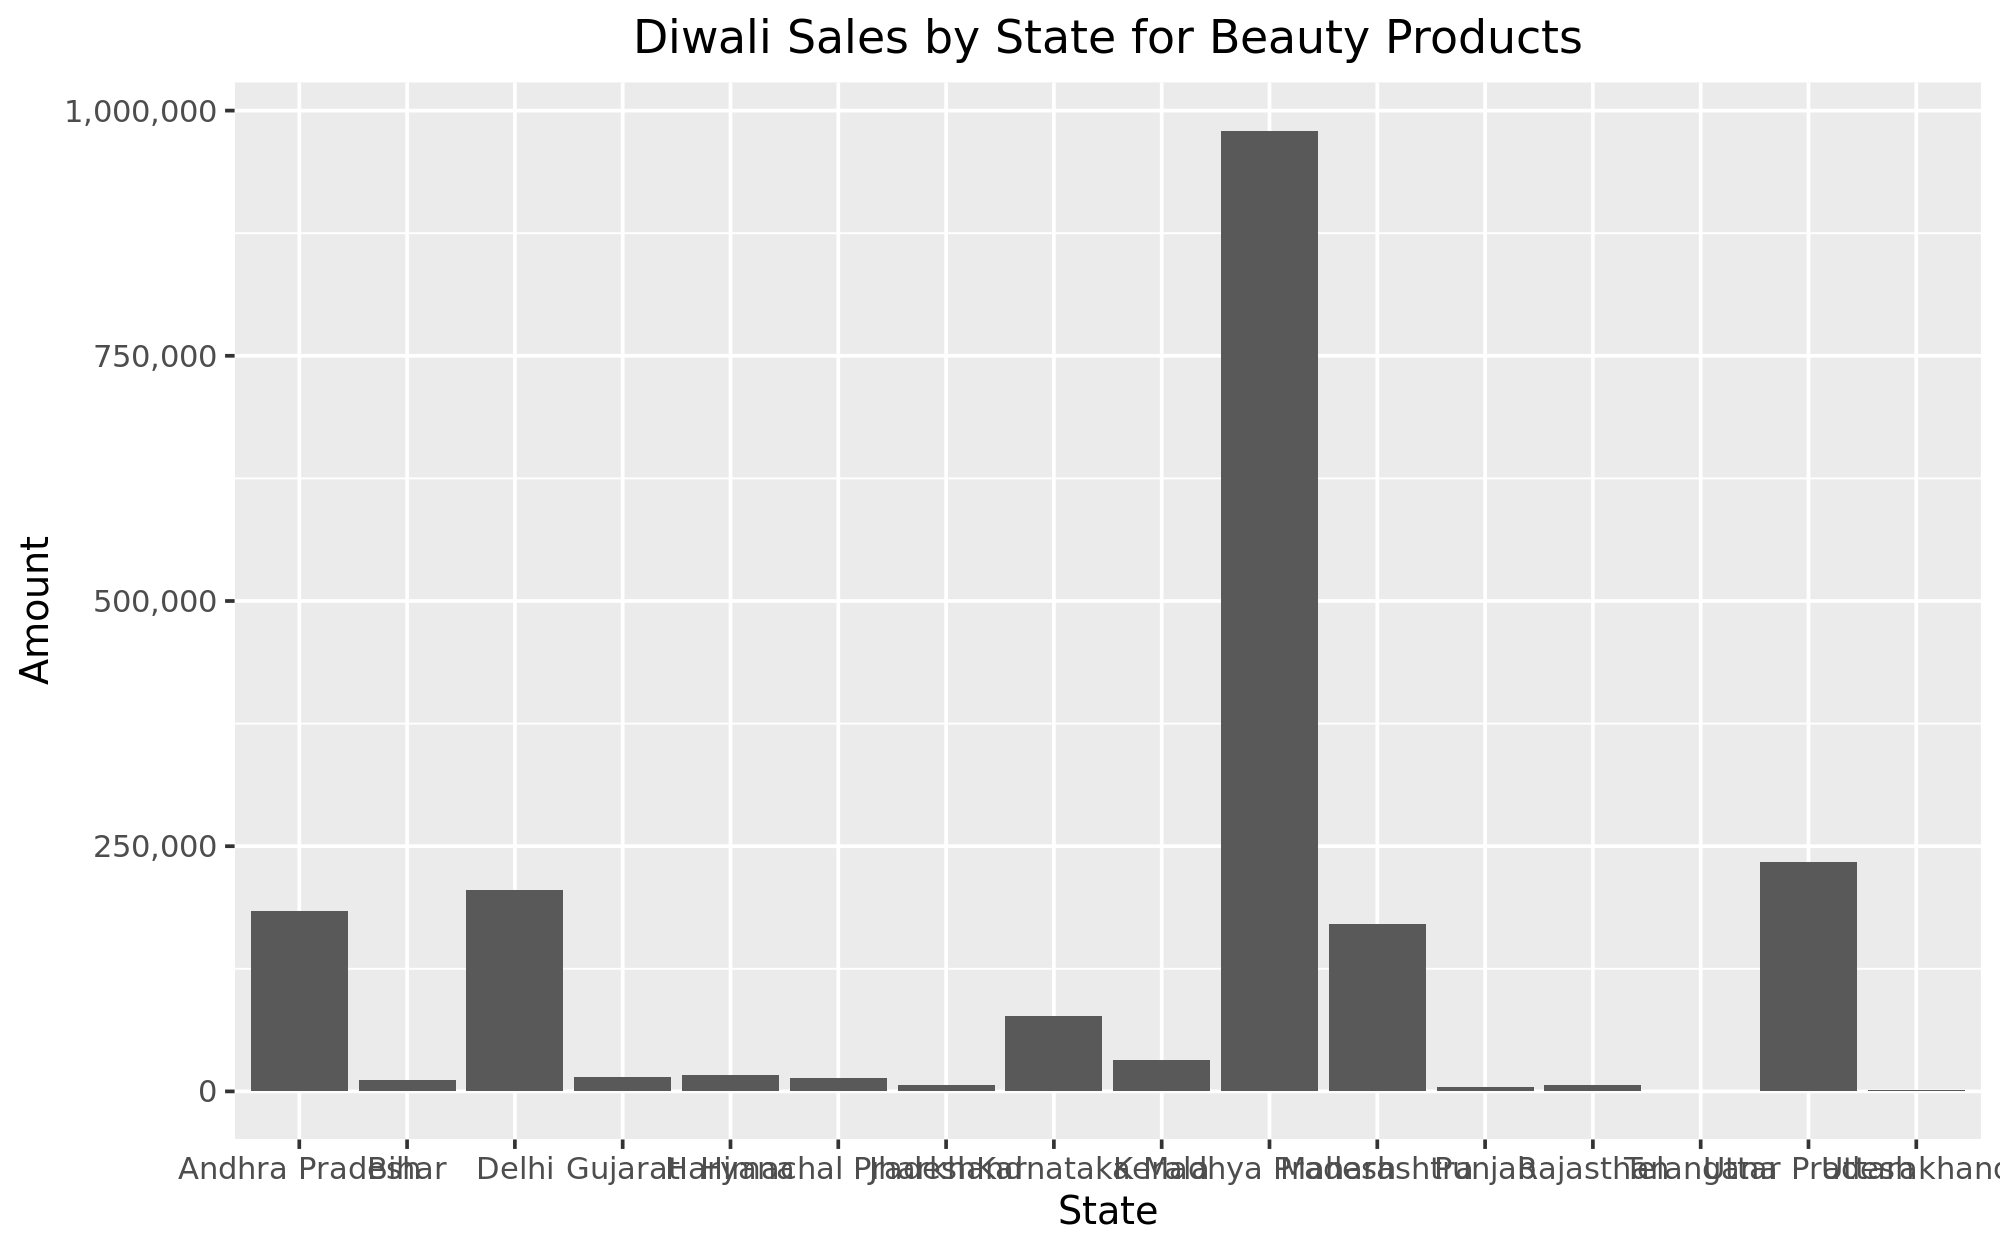

In [13]:
ggplot(sales_by_category_and_state, aes(x = State, y = Beauty)) +
  geom_bar(stat = "identity") +
  labs(
    x = "State",
    y = "Amount"
  ) +
  scale_y_continuous(labels = scales::comma) + 
  theme(plot.title = element_text(hjust = 0.5)) +  
  ggtitle("Diwali Sales by State for Beauty Products")

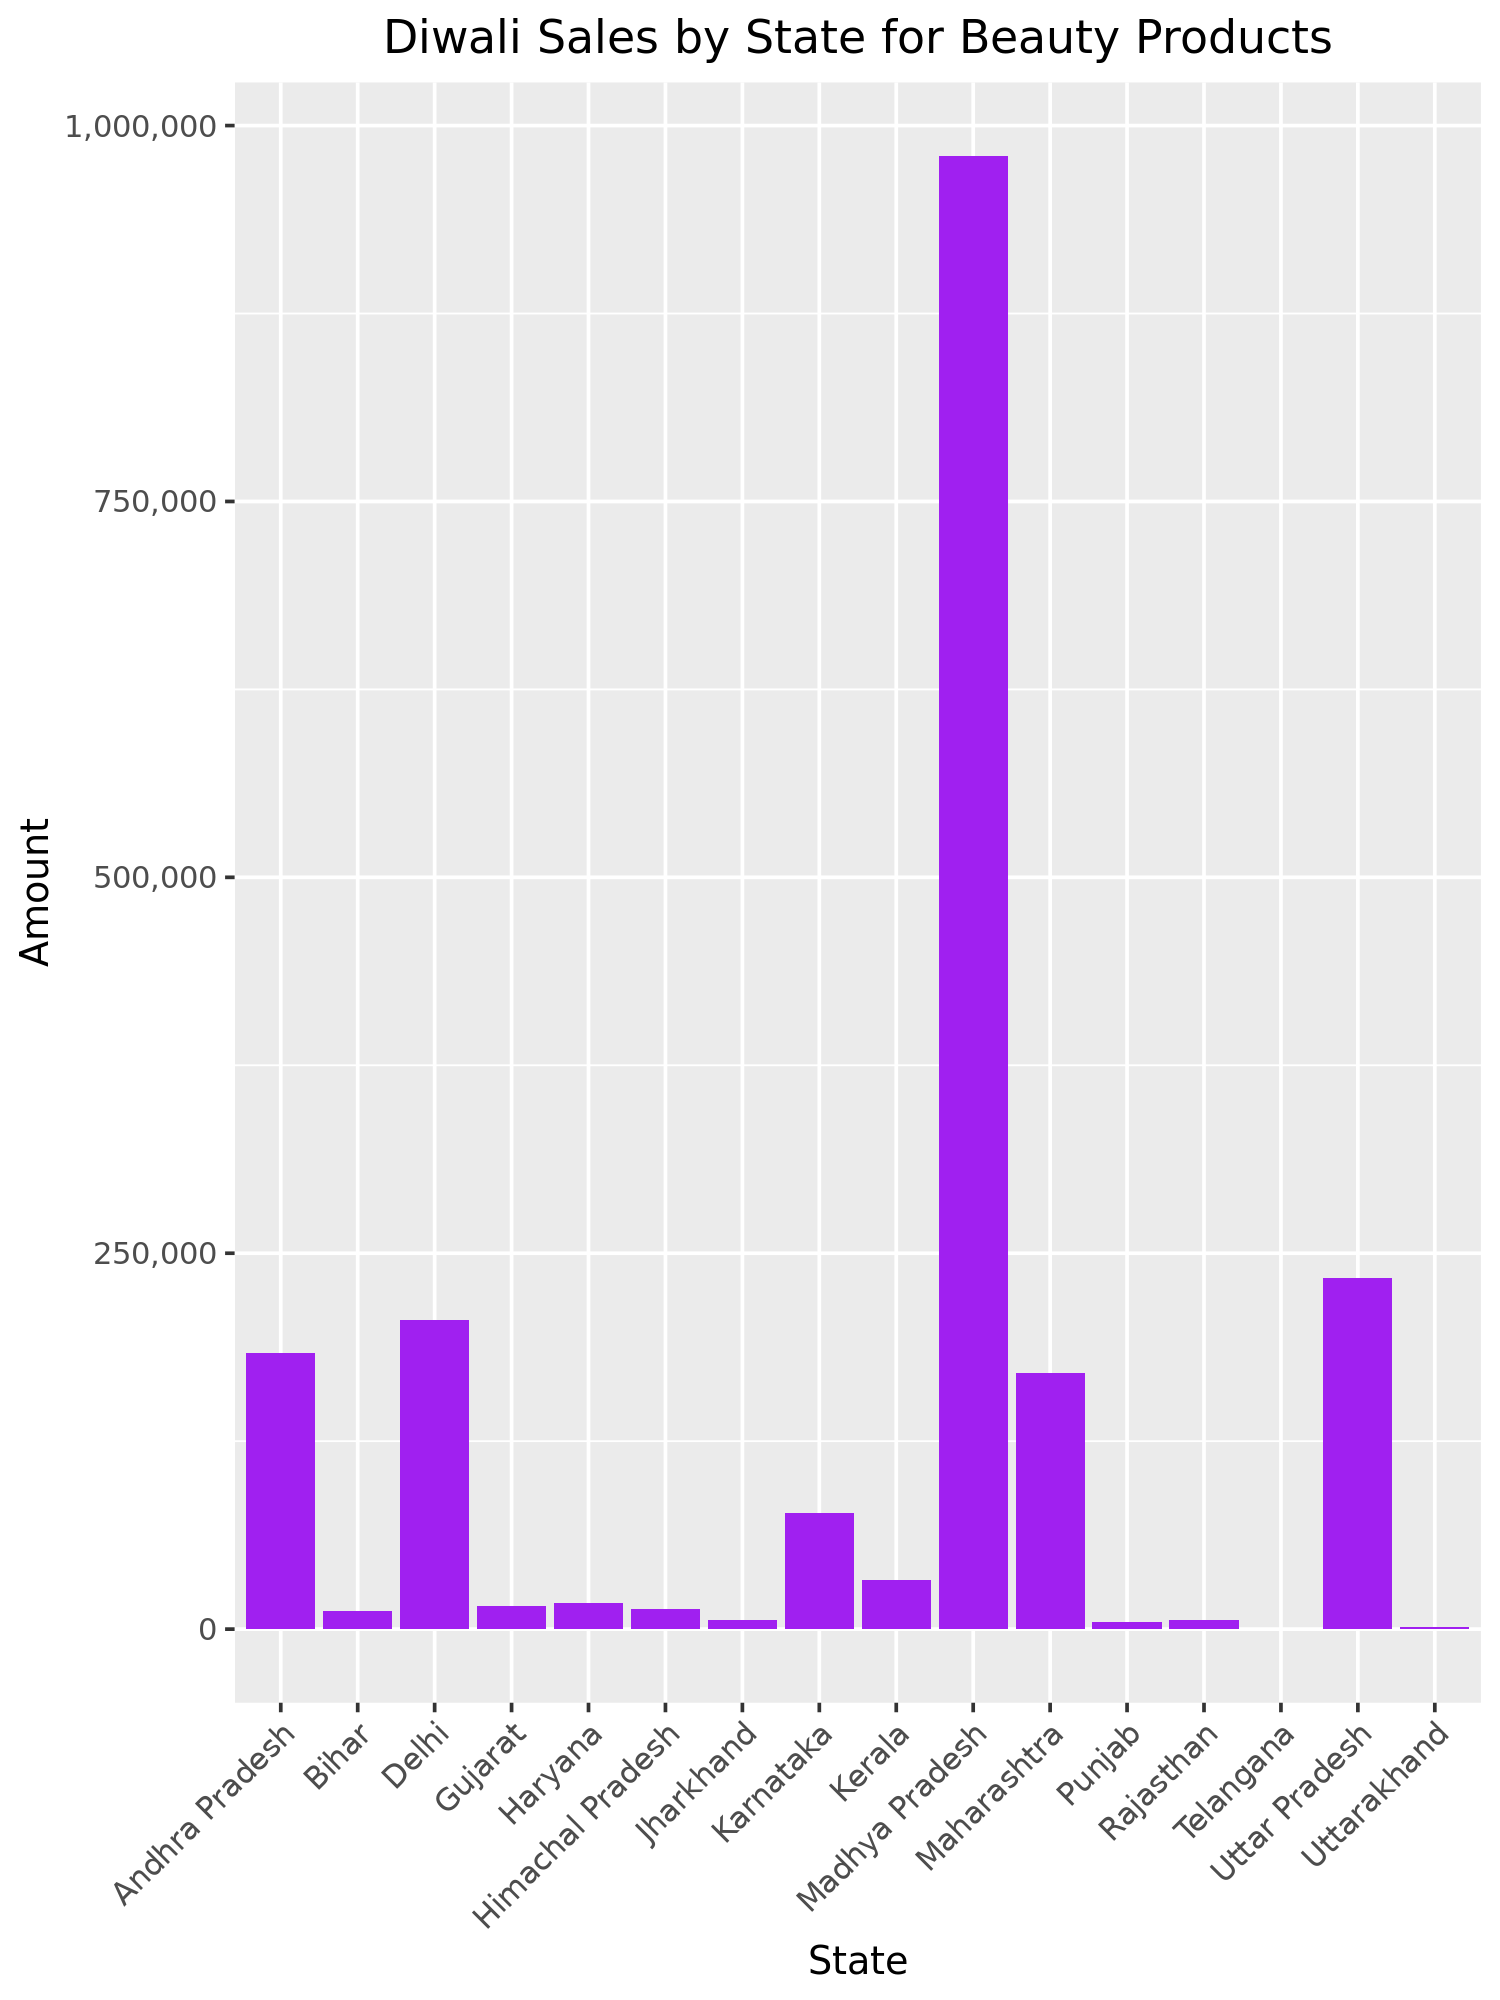

In [14]:
#Adjustments
options(repr.plot.res = 250, repr.plot.height = 8, repr.plot.width = 6)
ggplot(sales_by_category_and_state, aes(x = State, y = Beauty)) +
  geom_bar(stat = "identity", fill = "purple") +
  labs(
    x = "State",
    y = "Amount"
  ) +
  scale_y_continuous(labels = scales::comma) + 
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        plot.title = element_text(hjust = 0.5)) +  
  ggtitle("Diwali Sales by State for Beauty Products")